# Visualization in Python

One of the best ways to improve your data visualization skills is to try and replicate great visualizations you see out there.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'# this allows the visualisation to be seen more clearly?
import seaborn as sns

## ⚾ Strikeouts in Baseball

The first visualization we will try and replicate is a sports piece published by the New York Times in 2012. It is a beautiful visualization illustrating how strikeouts were on the rise. The visualization showcases the strikeouts per game by team as well as the aggregated strikeouts per game for the whole league. Read the [original article](https://archive.nytimes.com/www.nytimes.com/interactive/2013/03/29/sports/baseball/Strikeouts-Are-Still-Soaring.html?ref=baseball) to get more context.

![viz-baseball-strikeouts](viz-baseball-strikeouts.png)

The data for this visualization comes from an [excellent database](http://www.seanlahman.com/baseball-archive/statistics/) compiled by Sean Lahman that contains complete batting and pitching statistics from 1871 to 2020, plus fielding statistics, standings, team stats, managerial records, post-season data, and more.

In [3]:
teams = pd.read_csv('teams.csv')[['yearID', 'franchID', 'name', 'G', 'SO']] 
teams.head()

,yearID,franchID,name,G,SO
0,1871,BNA,Boston Red Stockings,31,19.0
1,1871,CNA,Chicago White Stockings,28,22.0
2,1871,CFC,Cleveland Forest Citys,29,25.0
3,1871,KEK,Fort Wayne Kekiongas,19,9.0
4,1871,NNA,New York Mutuals,33,15.0


In [18]:
# YOUR CODE HERE ----------
# G is number of games a team played
#SO stands for strikeouts which means number of times a batsmen get striked out.
#
team_sog = (
    teams
        .query('yearID >= 1900')
        .assign(SOG = lambda d: d.SO / d.G)#assign is a simpler way of creating columns, a shortcut to create columns.
)
red_sox_sog = (
    team_sog
        .query('name == "Boston Red Sox"')
)
league_sog = (
    team_sog
        .groupby('yearID', as_index=False)
        .agg(SOG = ('SOG','mean') )#this calculates the average.
)

team_sog.head()










,yearID,franchID,name,G,SO,SOG
375,1900,LAD,Brooklyn Superbas,141,269.0,1.907801
376,1900,ATL,Boston Beaneaters,142,270.0,1.901408
377,1900,CHC,Chicago Orphans,146,375.0,2.568493
378,1900,CIN,Cincinnati Reds,144,408.0,2.833333
379,1900,SFG,New York Giants,141,345.0,2.446809


Text(1885, 14, 'There were more strikeouts')

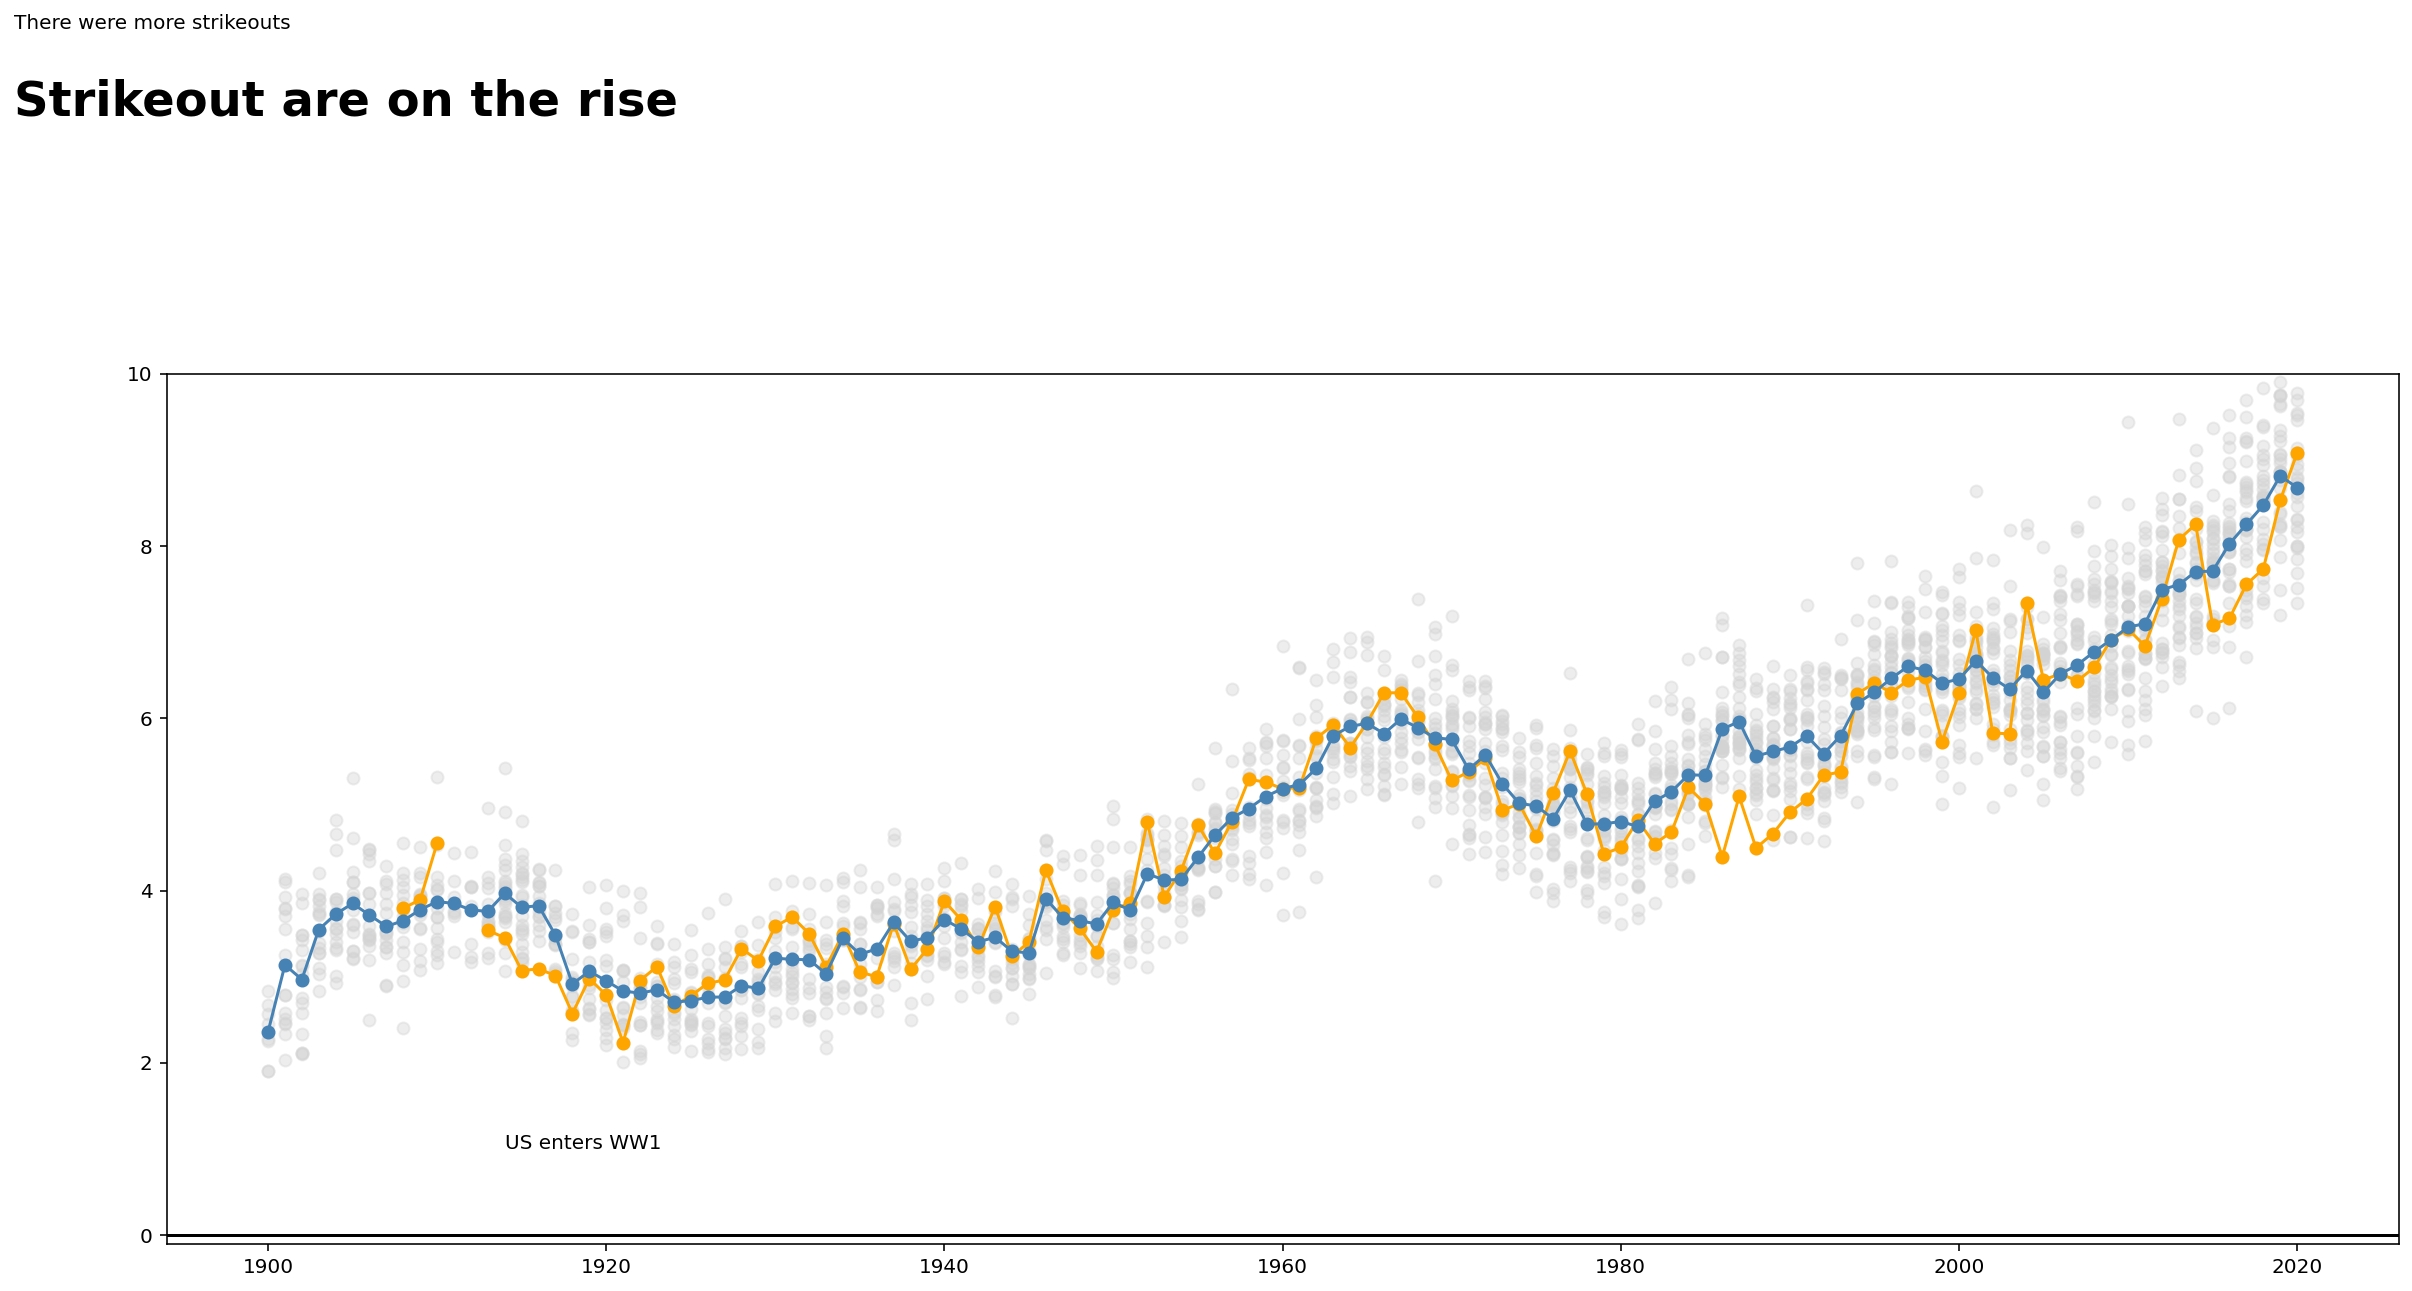

In [24]:
#PLOT DATA
#PLOT SETUP

plt.rcParams['figure.figsize'] = (20,8)

#add scatter plot for all SOG
plt.scatter(
    team_sog['yearID'],
    team_sog['SOG'],
    color = 'Lightgray',
    alpha = 0.4 # makes points not too prominent in the chart
)

#Add a line plot yaer for a specifi team

plt.plot(
    red_sox_sog['yearID'],
    red_sox_sog['SOG'],
    color = 'orange',
    marker = 'o' #marker argument allows you to add different shapes
)
    
#Add another line which describes the average SOG at a league level.
plt.plot(
    league_sog['yearID'],
    league_sog['SOG'],
    color = 'steelblue',
    marker = 'o' #marker argument allows you to add different shapes
)


#change axis limits
plt.ylim(-0.1,10)
plt.axhline(xmin = 0, color = 'black') 

#add text annotation layer

plt.text(
    1914,
    1,
    s = 'US enters WW1' # specify the text
)
            
#add title,subtitle etc
plt.text(1885,13, s= 'Strikeout are on the rise', fontsize = 24, fontweight = 'bold')
plt.text(1885,14, s = 'There were more strikeouts', fontsize = 10)# adding a : gets rid of the text line on 24

#plotly would allow you to add interactivity to the graph..
            

## 🦠 COVID Cases by State

The second visualization we will try and replicate is also from the New York Times and was published on March 21st 2020 to visualize the spread of COVID by state. Read the [original article](https://www.nytimes.com/interactive/2020/03/21/us/coronavirus-us-cases-spread.html) to get a better understanding.

In [ ]:
#This is a small multiples plot.


![viz-covid-by-state.png](viz-covid-by-state.png)

You will need two datasets to replicate this plot. The first dataset is provided by the New York Times and provides a time series of COVID cases by date. The second dataset provides a useful mapping of states to x-y coordinates on the grid. Use it wisely to place the different panels appropriately.

In [25]:
# COVID Cases by State
covid_cases = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_cases.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [26]:
# Grid Coordinates for States
# Source: https://github.com/hrbrmstr/statebins/blob/master/R/aaa.R
state_coords = pd.read_csv('state_coords.csv')
state_coords.head()

,abbrev,state,x,y
0,AL,Alabama,8,7
1,AK,Alaska,1,7
2,AZ,Arizona,3,6
3,AR,Arkansas,6,6
4,CA,California,2,5


In [44]:
plt.rcParams?

Type:        RcParams
String form:
_internal.classic_mode: False
           agg.path.chunksize: 0
           animation.avconv_args: []
           animation.avconv_pa <...> : True
           ytick.minor.size: 0.0
           ytick.minor.visible: False
           ytick.minor.width: 0.5
           ytick.right: False
Length:      305
File:        /usr/local/lib/python3.8/dist-packages/matplotlib/__init__.py
Docstring:  
A dictionary object including validation.

Validating functions are defined and associated with rc parameters in
:mod:`matplotlib.rcsetup`.

See Also
--------
:ref:`customizing-with-matplotlibrc-files`


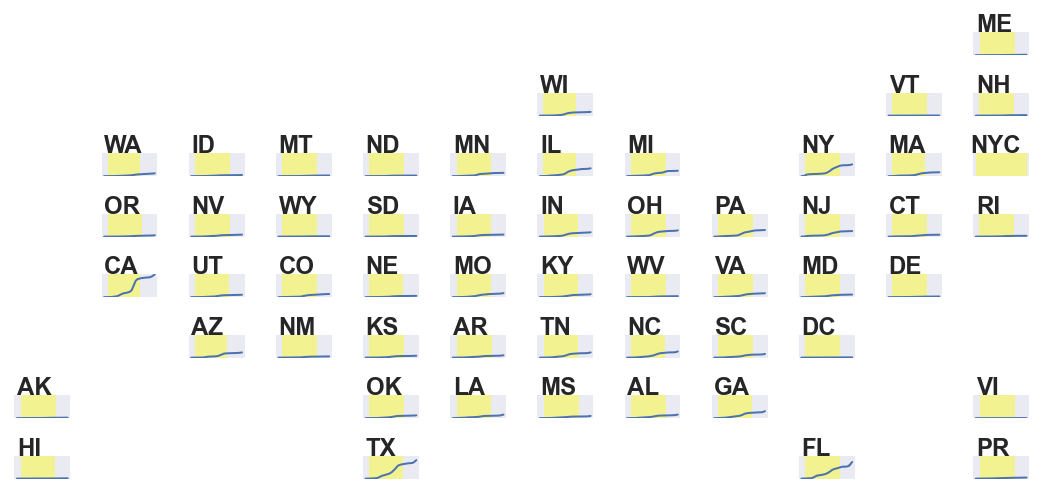

In [43]:
# YOUR CODE HERE -----
from matplotlib.patches import Rectangle
#plot setup
plt.rcParams['figure.figsize'] = (20,20)# rcParams is global parameters set for the whole code
plt.style.use('seaborn')
fig = plt.figure()

#define grid object

gs = fig.add_gridspec(nrows = 13, ncols=13)

#plot lines for each state
for state in state_coords.to_dict(orient='records'):#dict turns it into a dictionery, the records arg turn it a list of records
    ax=fig.add_subplot(gs[state['y'], state['x']])#it adds subplot in specific location
    ax.axes.xaxis.set_visible(False)#gets rid of the default axis values
    ax.axes.yaxis.set_visible(False)
    state_name = state["state"]
    d = (
        covid_cases
            .query('state == @state_name')#the @ symbol instructs panda that it is a variable in a function.
    )
    ax.plot(d['date'],d['cases'],linewidth = 1)
    ax.set_ylim(-1, covid_cases.cases.max())
    ax.text(x=0, y=covid_cases.cases.max(), s=state['abbrev'], fontweight = 'bold', fontsize = 'large')
    ax.add_patch(Rectangle((40,40), 360, covid_cases.cases.max(), color = "yellow", alpha = 0.4))

plt.plot
fig.tight_layout()

#Try adding a background image with the visualisation overlayed on the map of US.








